# Laboratorio 7
## Security Data Science
* César Rodas 16776
* Mario Andrés Perdomo 

## librerias

In [100]:
from math import log
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [101]:
!Pip install keras
!Pip install tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## generador de images

In [109]:
# cambiar el directorio a donde estén las imagenes del lab
imgs = ImageDataGenerator().flow_from_directory(directory='C:\GitHub\SDS\SDS-Lab7\malimg_dataset\malimg_paper_dataset_imgs', target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [103]:
for img, count in imgs.class_indices.items():
  print(img, count)

Adialer.C 0
Agent.FYI 1
Allaple.A 2
Allaple.L 3
Alueron.gen!J 4
Autorun.K 5
C2LOP.P 6
C2LOP.gen!g 7
Dialplatform.B 8
Dontovo.A 9
Fakerean 10
Instantaccess 11
Lolyda.AA1 12
Lolyda.AA2 13
Lolyda.AA3 14
Lolyda.AT 15
Malex.gen!J 16
Obfuscator.AD 17
Rbot!gen 18
Skintrim.N 19
Swizzor.gen!E 20
Swizzor.gen!I 21
VB.AT 22
Wintrim.BX 23
Yuner.A 24


In [104]:
imgs_next, img_labels = next(imgs)

In [35]:
imgs_next.shape

(9339, 128, 128, 3)

In [36]:
img_labels.shape

(9339, 25)

In [56]:
malware_fam = imgs.class_indices.keys()

In [57]:
frecuencias = (sum(img_labels)/img_labels.shape[0])*100

<BarContainer object of 25 artists>

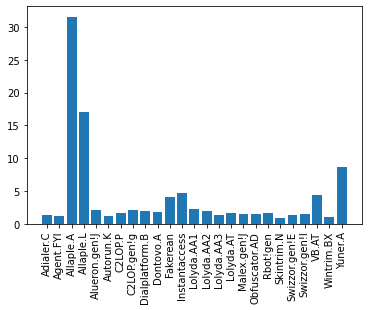

In [61]:
plt.xticks(rotation='vertical')
plt.bar(malware_fam,frecuencias)


* no existe ninguna familia que tenga valores muy bajos como para descartarlos del modelo

## imagenes de las familias

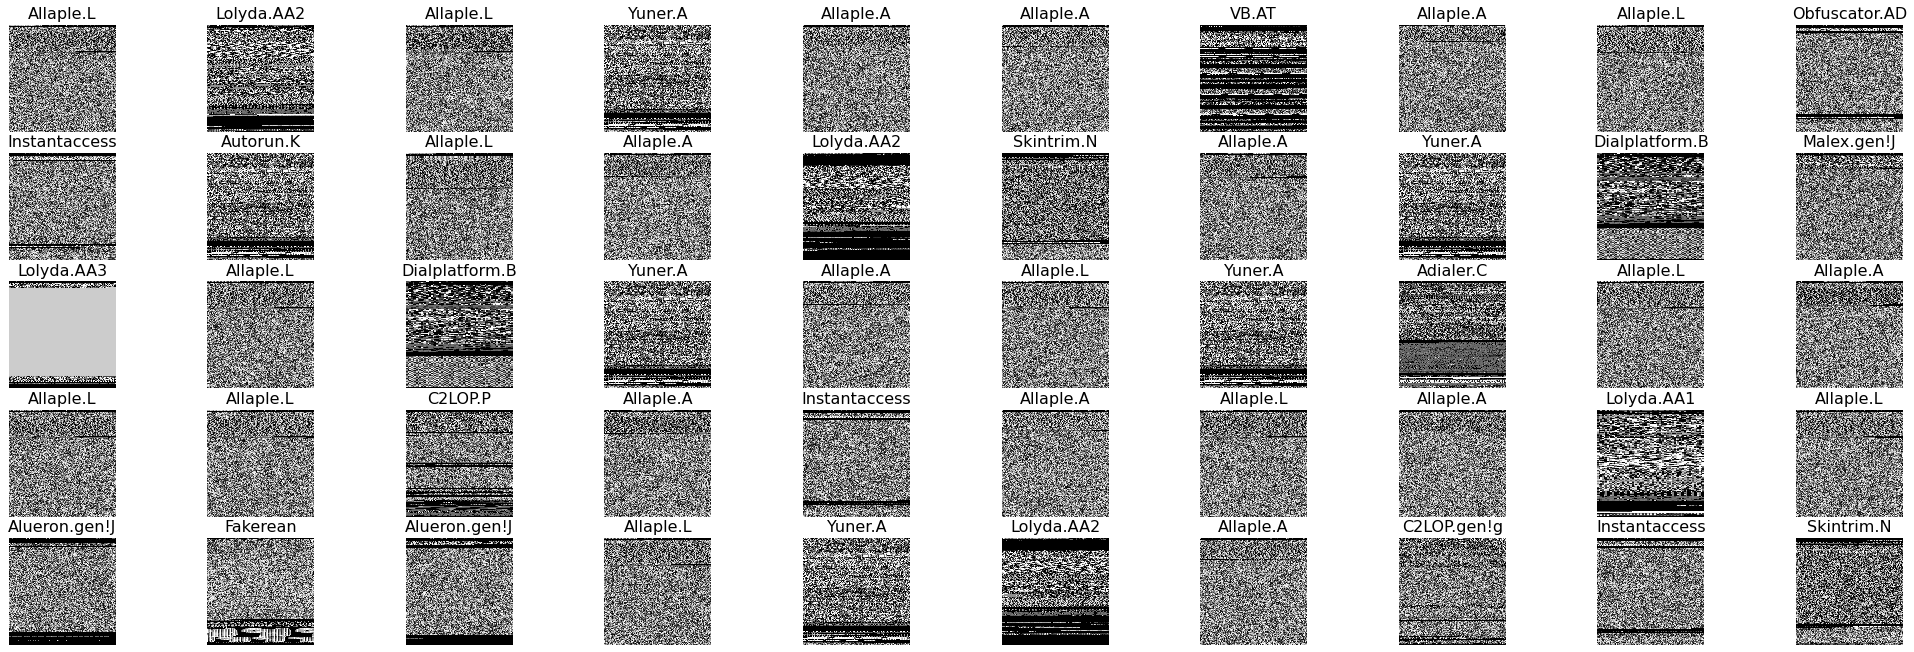

In [59]:
interp=False
if type(imgs_next[0]) is np.ndarray:
  imgs_next = np.array(imgs_next).astype(np.uint8)
  if (imgs_next.shape[-1] != 3):
    imgs_next = imgs_next.transpose((0,2,3,1))
f = plt.figure(figsize=(35,35))
for i in range(0,50):
  sp = f.add_subplot(15, 10, i+1)
  sp.axis('Off')
  if img_labels is not None:
    sp.set_title(list(imgs.class_indices.keys())[np.argmax(img_labels[i])], fontsize=16)
  plt.imshow(imgs_next[i], interpolation=None if interp else 'none')

## modelo

In [69]:
features, test, target_features, target_test = train_test_split(imgs_next/255, img_labels, test_size=0.3)

In [71]:
features.shape

(6537, 128, 128, 3)

In [72]:
test.shape

(2802, 128, 128, 3)

In [73]:
target_features.shape

(6537, 25)

In [74]:
target_test.shape

(2802, 25)

In [64]:
# modelo
cnn = Sequential()

In [65]:
cnn.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(25, activation='softmax'))


In [66]:
cnn.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [67]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        8672      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 flatten (Flatten)           (None, 28800)             0

In [76]:
cnn.fit(features, target_features, validation_data=(test, target_test), epochs=10)

Epoch 1/10
205/205 [==============================] - 64s 313ms/step - loss: 0.1265 - accuracy: 0.9590 - val_loss: 0.1131 - val_accuracy: 0.9582
Epoch 2/10
205/205 [==============================] - 62s 302ms/step - loss: 0.1061 - accuracy: 0.9650 - val_loss: 0.1144 - val_accuracy: 0.9590
Epoch 3/10
205/205 [==============================] - 64s 312ms/step - loss: 0.1060 - accuracy: 0.9668 - val_loss: 0.1216 - val_accuracy: 0.9597
Epoch 4/10
205/205 [==============================] - 63s 306ms/step - loss: 0.0969 - accuracy: 0.9697 - val_loss: 0.1115 - val_accuracy: 0.9629
Epoch 5/10
205/205 [==============================] - 62s 302ms/step - loss: 0.0803 - accuracy: 0.9749 - val_loss: 0.1265 - val_accuracy: 0.9643
Epoch 6/10
205/205 [==============================] - 66s 324ms/step - loss: 0.0855 - accuracy: 0.9729 - val_loss: 0.1266 - val_accuracy: 0.9597
Epoch 7/10
205/205 [==============================] - 63s 310ms/step - loss: 0.0680 - accuracy: 0.9807 - val_loss: 0.1164 - val_ac

In [77]:
cnn_scores = cnn.evaluate(test, target_test)

88/88 [==============================] - 5s 55ms/step - loss: 0.1238 - accuracy: 0.9622


In [78]:
print('CNN Accuracy final del grupo de prueba: ', cnn_scores[1])

CNN Accuracy final del grupo de prueba:  0.962169885635376


## Matriz de confusión

In [82]:

predict = np.argmax(cnn.predict(test), axis=-1)


In [88]:
target_test = np.argmax(target_test, axis=-1)

In [91]:
matrix = confusion_matrix(target_test, predict)

In [92]:
matrix

array([[ 33,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  39,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 859,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 486,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  60,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33],
       [  0,   0,   0,   0,   0,   0,  34,   6,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   8,   0,   0,   0],
      

<AxesSubplot:>

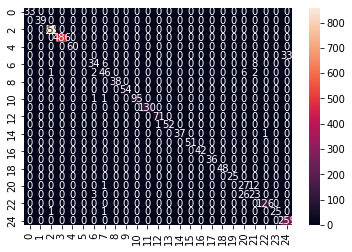

In [108]:
import seaborn as sns
import pandas as pd
sns.heatmap(pd.DataFrame(matrix), annot=True, fmt='g')

In [93]:
print(classification_report(target_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       859
           3       1.00      1.00      1.00       486
           4       1.00      1.00      1.00        60
           5       0.00      0.00      0.00        33
           6       0.85      0.71      0.77        48
           7       0.84      0.81      0.82        57
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        54
          10       1.00      0.98      0.99        97
          11       1.00      1.00      1.00       130
          12       0.99      1.00      0.99        71
          13       1.00      0.98      0.99        53
          14       1.00      0.97      0.99        38
          15       1.00      1.00      1.00        51
          16       1.00      1.00      1.00        42
          17       1.00    

C:\Users\cesarvin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cesarvin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cesarvin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

### En general se puede concluir que se obtuvieron buenas metricas para el modelo, aunque en la matrix de confusión se puede observar que hay una familia que no se puede predecír, probablemente por ser la que menos datos tiene, podría eliminarse para mejorar el modelo. Sin embargo las metricas obtenidas se obtuvo un buen acurracy y una buena precisión para el modelo.